In [ ]:
#Uploading file and checking what all columns are there
from google.colab import files
uploaded = files.upload()

Saving realistic_ocean_climate_dataset.csv to realistic_ocean_climate_dataset.csv


In [ ]:
import io
import pandas as pd
my_df= pd.read_csv(io.BytesIO(uploaded['realistic_ocean_climate_dataset.csv']))

In [ ]:
my_df.head() #checking what all columns

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [ ]:
#Checking how many NaN is there in below listed columns
print(my_df[[ 'Latitude', 'Longitude', 'SST (°C)', 'pH Level','Bleaching Severity', 'Species Observed', 'Marine Heatwave']].isna().sum())

Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64


In [ ]:
# Bleaching Severity has 500 NaN which is actualy None, so replacing NaN by None
my_df['Bleaching Severity'] = my_df['Bleaching Severity'].fillna('None')

my_df['Marine Heatwave'] = my_df['Marine Heatwave'].astype(int)
my_df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,None,106,0
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,0
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,0
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,0
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,None,110,0


In [ ]:
print(my_df.columns)

Index(['Date', 'Location', 'Latitude', 'Longitude', 'SST (°C)', 'pH Level',
       'Bleaching Severity', 'Species Observed', 'Marine Heatwave'],
      dtype='object')


In [ ]:
my_df['Bleaching Severity'] = my_df['Bleaching Severity']. replace ('None',0 )
my_df['Bleaching Severity'] = my_df['Bleaching Severity']. replace ('Low', 1)
my_df['Bleaching Severity'] = my_df['Bleaching Severity']. replace ('Medium', 2)
my_df['Bleaching Severity'] = my_df['Bleaching Severity']. replace ('High', 3)

<ipython-input-112-9db03f9a19e5>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['Bleaching Severity'] = my_df['Bleaching Severity']. replace ('High', 3)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
 # Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(6 feacture - SST (°C), pH Level, Latitude, Longitude, Species Observed, Marine Heatwave (binary= 0 or 1))
  #--> Hidden Layer1 (some number of neurons)
  #--> Hidden Layer2 (some number of neurons)
  #--> output(Bleaching Severity for which None = 0, Low = 1, Medium = 2, High = 3)
  def __init__(self,in_feactures=2, h1=30, h2=16,out_feactures=4 ):
    super().__init__() #initiate our nn.Module
    self.fc1 = nn.Linear(in_feactures , h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2, out_feactures)
  def forward(self,x):
   x = F.relu(self.fc1(x))
   x = F.relu(self.fc2(x))
   x = self.out(x)
   return x

In [ ]:
#Pick a manual seed for randomization
torch.manual_seed(50)



In [ ]:
# Train Test spliT. Set X,y and converting X and y to numpy array by using .values
X = my_df.drop(columns=['Date', 'Bleaching Severity','Location','Latitude', 'Longitude','Marine Heatwave','Species Observed'], axis=1).values
y = my_df['Bleaching Severity'].values

from sklearn.model_selection import train_test_split
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32) # Convert X feactures to float Tensors
X_test_scaled = scaler.transform(X_test)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
#Convert y  to  Long tensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
model = Model()
#Choose Adam Optimizer, lr - learning rate(if our error doesn't go down after bunch of iteration(epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)
criterion = nn.CrossEntropyLoss()

epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train_tensor) #prediction
  loss = criterion(y_pred, y_train) # prediction vs true
  losses.append(loss.detach().numpy()) # track losses nad convert from tensor to number
  #print every 10 epoch
  if i % 100 == 0:
    print( f' Epoch: {i} and loss :{loss}')
  # Back Propogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

 Epoch: 0 and loss :1.3933470249176025
 Epoch: 100 and loss :1.266249418258667
 Epoch: 200 and loss :1.1680711507797241
 Epoch: 300 and loss :1.0808213949203491
 Epoch: 400 and loss :1.0171141624450684
 Epoch: 500 and loss :0.971488893032074
 Epoch: 600 and loss :0.9364941120147705
 Epoch: 700 and loss :0.9083477854728699
 Epoch: 800 and loss :0.8847343921661377
 Epoch: 900 and loss :0.8641185164451599


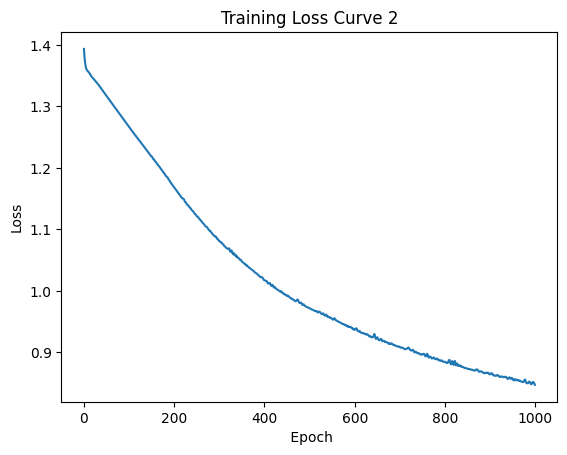

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs),losses)
plt.title("Training Loss Curve 2")
plt.xlabel(" Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
#Evaluate Model on Test Data set
with torch.no_grad():  #turn off back propogation
   y_eval = model.forward(X_test_tensor)
   loss = criterion(y_eval, y_test)

   print(loss)

tensor(3.0440)


In [ ]:
model.eval() # set model to evaluation mode

# Lists to store all predictions and true labels across batches
all_preds = []
all_targets = []

# Variable to accumulate total loss across all batches
val_loss = 0.0

correct = 0

with torch.no_grad(): # disables gradient tracking
  for i, data in enumerate(X_test_tensor):
    data = data.unsqueeze(0)  # Add batch dimension (shape: [1, ...])
    y_val = model(data) # Forward pass to get raw model outputs(logit)
    pred = y_val.argmax().item() # Get predicted class index (highest logit)
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t  {pred}')  # Print logits, true label, and predicted label for each sample

    # Collect predictions and true targets
    all_preds.append(pred)
    all_targets.append(y_test[i])

     # Count correct predictions
    if pred == y_test[i]:
      correct += 1

# Print total number of correct predictions
print(f'We got {correct} correct out of {len(y_test)} samples.')

# calculate accuracy
accuracy = correct / len(y_test)
print(f'Accuracy: {accuracy:.2%}')

1.) tensor([[-2.4299,  0.1898, -0.6595, -3.0480]]) 	 2 	  1
2.) tensor([[0.7862, 0.3080, 0.9408, 0.3586]]) 	 0 	  2
3.) tensor([[ 3.3946, -4.4400,  5.1007,  0.5111]]) 	 3 	  2
4.) tensor([[-0.2308,  1.3797,  0.6090,  1.1389]]) 	 3 	  1
5.) tensor([[ 3.1611, -0.3880, -0.9664,  2.3101]]) 	 2 	  0
6.) tensor([[ 0.5101,  2.1124, -0.4970, -0.6821]]) 	 0 	  1
7.) tensor([[ 3.6269, -4.1898,  4.5976,  0.4931]]) 	 1 	  2
8.) tensor([[ 2.0181,  0.2722,  0.4118, -0.2531]]) 	 0 	  0
9.) tensor([[-2.2935, -0.3173, -0.3738, -2.4679]]) 	 1 	  1
10.) tensor([[ 0.9651, -1.4823,  1.4081, -0.0862]]) 	 3 	  2
11.) tensor([[ 2.0149, -2.1659,  2.5642,  3.3976]]) 	 2 	  3
12.) tensor([[ 13.8786,   3.5744,   7.6567, -34.2214]]) 	 0 	  0
13.) tensor([[-0.7657, -1.2197, -0.6913, -2.4064]]) 	 2 	  2
14.) tensor([[ 1.2243,  0.0223, -0.3234, -0.3837]]) 	 0 	  0
15.) tensor([[ 3.4023,  0.7177, -1.8469,  1.1956]]) 	 2 	  0
16.) tensor([[ 0.4476, -0.1849,  0.0078,  0.3303]]) 	 1 	  0
17.) tensor([[1.3170, 1.0550, 1.0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Now print classification report
class_names = ['None', 'Low', 'Medium', 'High']
print("Classification Report:")
print(classification_report(all_targets, all_preds, target_names=class_names))

#Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(all_targets, all_preds))

Classification Report:
              precision    recall  f1-score   support

        None       0.32      0.43      0.37        28
         Low       0.30      0.19      0.24        31
      Medium       0.12      0.21      0.16        19
        High       0.09      0.05      0.06        22

    accuracy                           0.23       100
   macro avg       0.21      0.22      0.21       100
weighted avg       0.23      0.23      0.22       100

Confusion Matrix:
[[12  6  7  3]
 [11  6 11  3]
 [ 7  4  4  4]
 [ 7  4 10  1]]
